# 생존율의 추정 및 두 군의 생존율 비교
1. Kaplan-Meier 생존분석
1. 로그순위법
1. 생존율에 영향을 미치는 위험인자
  1. Cox의 비례위험모형

어떤 암의 생존율을 파악하거나 두 가지 치료법의 예후를 비교하는 것은 임의의 한 시점의 환자 상태를 조사하는 것만으로는 부족할 수 있다. 두 치료법의 5년 혹은 10년 생존율이 같다고 해서 두 가지 치료가 똑같은 의미를 갖는 것은 아닐 수 있기 때문이다. 예를 들어, 아무런 치료를 받지 않았을 때 6개월 내에 80%의 사망률을 보이는 암이 항암치료를 통해 2년 생존율을 50%까지 올릴 수 있다면 설령 5년 뒤의 생존율이 같더라도 항암치료는 임상적으로 의미를 가지기에 충분하다. 이렇듯 시간에 따른 사망이나 재발 등의 변화를 관찰하는 분석을 생존분석(survival analysis)이라 하며, 생존분석에서 '사망'이나 '재발'과 같이 연구자가 관심을 갖고 있는 변화를 사건(event)이라고 한다. 생존분석에서 분석의 대상은 사건 발생까지의 시간(time to event)이다. 의학 및 보건 연구에서 흔히 시행되는 생존분석으로는 특정 집단의 생존율을 추정하는 Kaplan-Meier 생존분석(Kaplan-Meier curve Analysis)와, 두 집단의 생존율을 비교하는 로그 순위법(Log-rank test), 그리고 생존율에 영향을 미치는 위험인자를 분석하는 Cox의 비례위험모형(Cox's proportional regression analysis)등이 있다. 

Python에서 생존율 분석을 위해서는 lifelines 라이브러리가 필요하다. conda를 사용해서 아래와 같이 미리 설치하면 된다. 


```!conda install -c conda-forge lifelines```

In [3]:
from lifelines import KaplanMeierFitter
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv("data/7_ovrian_cancer_survival_data.csv")
df.head()

ModuleNotFoundError: No module named 'lifelines'

In [2]:
groups = df['treatment']
i1 = (groups == 1) ## group i1, having the pandas series for the 1st cohort
i2 = (groups == 2) ## group i2, having the pandas series for the 2st cohort

T = df['month']
E = df['death']

# Kaplan-Meier 생존분석

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0        13       13
2.0             1         1         0         0       13
3.0             1         1         0         0       12
5.0             1         1         0         0       11
8.0             1         1         0         0       10
11.0            1         1         0         0        9
14.0            2         1         1         0        8
15.0            1         0         1         0        6
21.0            1         1         0         0        5
26.0            1         0         1         0        4
28.0            1         0         1         0        3
34.0            1         0         1         0        2
36.0            1         0         1         0        1
          Standard
timeline          
0.0       1.000000
2.0       0.923077
3.0       0.846154
5.0       0.769231
8.0       0.692308
11.0      0.

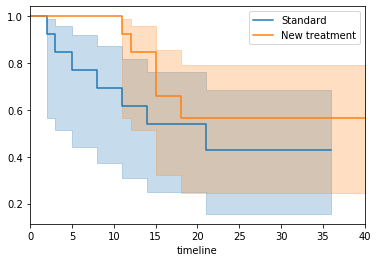

In [35]:
import matplotlib as plt

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Standard')
print(kmf1.event_table)
print(1- kmf1.cumulative_density_)
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='New treatment')
print(kmf1.event_table)
print(1- kmf1.cumulative_density_)
kmf1.plot(ax=a1)

표준 치료법의 2년 생존융은 43.1%, 새 치료법의 2년 생존율은 56.4%이다. 

# 로그순위법(Log-rank test)

In [37]:
from lifelines.statistics import logrank_test

results = logrank_test(T[i1], T[i2], event_observed_A=E[i1], event_observed_B=E[i2])
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic    p  -log2(p)
           1.12 0.29      1.78


H<sub>0</sub> : 두 군의 생존곡선은 같다.  
H<sub>1</sub> : 두 군의 생존곡선은 다르다.  
p=0.291 > 0.05 이므로 H<sub>0</sub> 채택  
--> 두 군의 생존곡선은 다르다고 말할 수 없다. 

# Cox의 비례위험모형

In [8]:
df = pd.read_csv('data/11_colon_cancer_survival_data.csv')
df.head()

,id,time,status,rx,sex,age,obstruct,perfor,adhere,differ,extent,node4,nodes
0,1,1521,1,3,1,43,0,0,0,2.0,3,1,5.0
1,2,968,1,3,1,43,0,0,0,2.0,3,1,5.0
2,3,3087,0,3,1,63,0,0,0,2.0,3,0,1.0
3,4,3087,0,3,1,63,0,0,0,2.0,3,0,1.0
4,5,963,1,1,0,71,0,0,1,2.0,2,1,7.0


In [14]:
df.drop(['id'], axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [15]:
df.head()

,time,status,rx,sex,age,obstruct,perfor,adhere,differ,extent,node4,nodes
0,1521,1,3,1,43,0,0,0,2.0,3,1,5.0
1,968,1,3,1,43,0,0,0,2.0,3,1,5.0
2,3087,0,3,1,63,0,0,0,2.0,3,0,1.0
3,3087,0,3,1,63,0,0,0,2.0,3,0,1.0
4,963,1,1,0,71,0,0,1,2.0,2,1,7.0


In [22]:
df = df.fillna(0)

In [23]:
from lifelines import CoxPHFitter

# Using Cox Proportional hazards model
cph = CoxPHFitter()  ## Instantiate the class to create a cph object

cph.fit(df, 'time', event_col='status') ## Fit the data to train the model

cph.print_summary()  ## have a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 1858 observations, 938 censored>
      duration col = 'time'
         event col = 'status'
number of subjects = 1858
  number of events = 920
    log-likelihood = -6471.86
  time fit was run = 2019-08-06 02:43:55 UTC

---
          coef exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
rx       -0.21      0.81      0.04 -5.17 <0.005     22.02       -0.29       -0.13
sex      -0.01      0.99      0.07 -0.21   0.83      0.27       -0.14        0.12
age       0.00      1.00      0.00  0.79   0.43      1.21       -0.00        0.01
obstruct  0.24      1.27      0.08  2.88 <0.005      7.96        0.08        0.40
perfor    0.11      1.12      0.18  0.62   0.54      0.90       -0.25        0.48
adhere    0.19      1.21      0.09  2.12   0.03      4.88        0.01        0.37
differ    0.11      1.12      0.06  1.88   0.06      4.07       -0.00        0.23
extent    0.46      1.58      0.08  5.74 <0.005     26.61        0.30        0.61
node

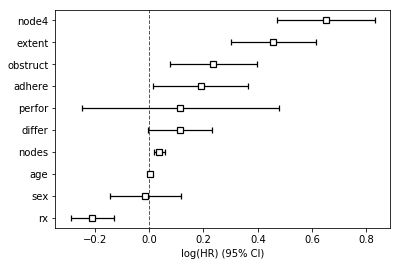

In [24]:
cph.plot()

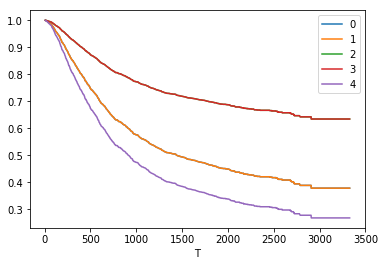

In [26]:
cph.predict_survival_function(df[:5]).plot()